In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-21/spotify_songs.csv')
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


Lets see how many columns the dataset has.

In [3]:
df.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

In [4]:
df.shape

(32833, 23)

So,we have 32833 rows and 23 columns.

Lets check if there are missing values in the dataset.

In [5]:
# checking missing values.
df.isnull().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

There are only few missing values in the data set.Hence it would not affect much to the analysis.

Lets,drop the id columns in the dataset which is not useful for the analysis.

In [6]:
df_new = df.drop(['track_id','track_album_id','playlist_id'],axis = True)
df_new.head()

,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,Memories - Dillon Francis Remix,Maroon 5,67,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,All the Time - Don Diablo Remix,Zara Larsson,70,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,Call You Mine - The Remixes,2019-07-19,Pop Remix,pop,dance pop,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,pop,dance pop,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


# Top 50 Artists

Let's see how many artists are there in the dataset.

Text(0, 0.5, 'Number of songs')

C:\Users\ADMIN\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12458 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ADMIN\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12513 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ADMIN\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12460 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ADMIN\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12488 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ADMIN\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12521 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ADMIN\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12452 missing from c

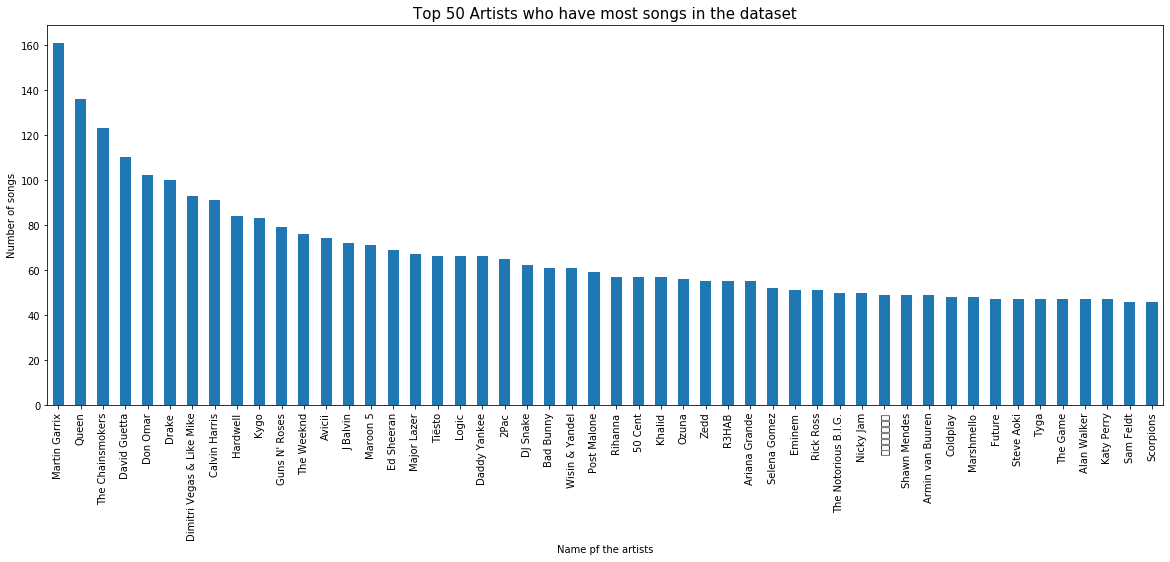

In [7]:
#Top 50 track_artists
plt.figure(figsize = (20,7))
artist = df_new['track_artist'].value_counts().iloc[0:50].plot(kind = 'bar')
plt.title('Top 50 Artists who have most songs in the dataset',fontsize = 15)
plt.xlabel('Name pf the artists')
plt.ylabel('Number of songs')

In [8]:
df_new['track_popularity'].unique()

array([ 66,  67,  70,  60,  69,  62,  68,  58,  63,  65,  35,  64,   8,
        30,  56,  55,  59,  87,  83,  61,  57,  53,  34,  74,  46,  52,
        45,  51,  48,  39,  71,  81,  85,  76,  75,  73,  79,  16,  84,
        37,  36,  72,  77,  82,  41,   5,  24,  18,  47,  80,  96,  86,
        19,  27,  43,  91,  42,  21,  54,   9,  23,  40,   2,  11,  50,
        10,  49,   6,  25,  95,   1,   4,  28,  29,  38,  17,  31,  26,
        32,  12,  44,   7,   0,  13,  78,  88,  94,  22,  98,  97,  90,
        93,  92,   3,  33,  20,  14,  15,  89, 100,  99], dtype=int64)

In [11]:
# Data only from the year greater than 2000
new = df_new[df_new['year']>2000]
new.head()

,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year
0,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,pop,dance pop,0.748,0.916,...,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754,2019
1,Memories - Dillon Francis Remix,Maroon 5,67,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,pop,dance pop,0.726,0.815,...,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600,2019
2,All the Time - Don Diablo Remix,Zara Larsson,70,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,pop,dance pop,0.675,0.931,...,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616,2019
3,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,Call You Mine - The Remixes,2019-07-19,Pop Remix,pop,dance pop,0.718,0.930,...,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093,2019
4,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,pop,dance pop,0.650,0.833,...,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052,2019


Text(0, 0.5, 'Number of songs')

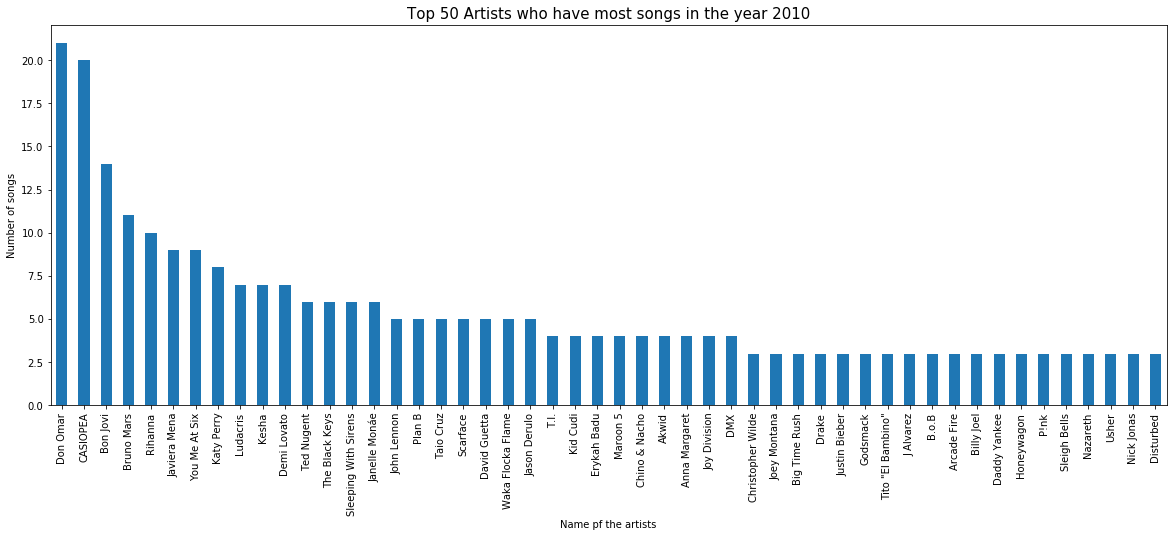

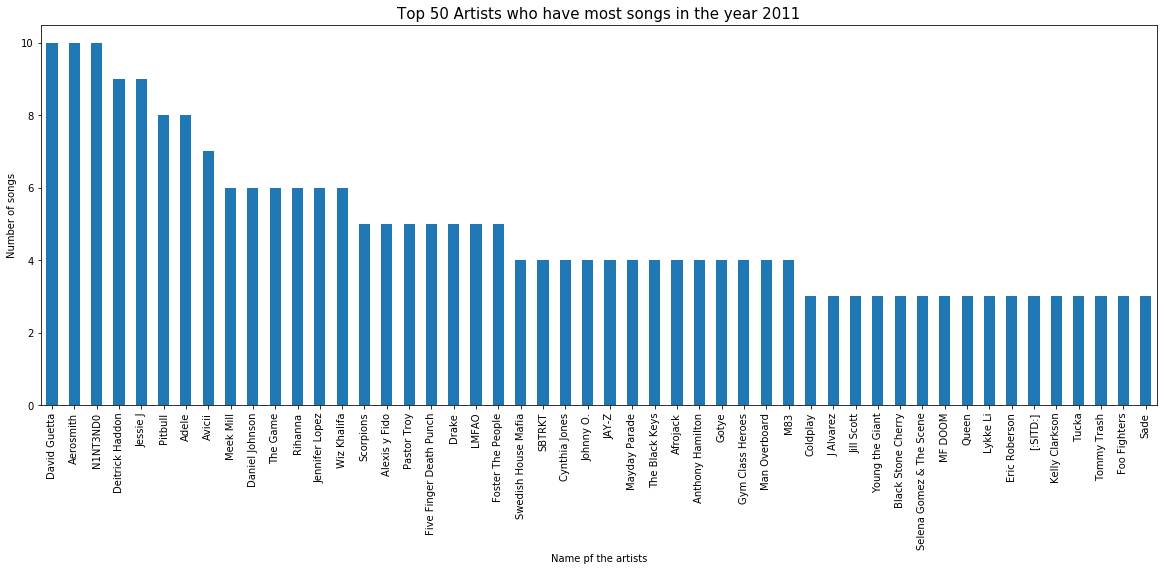

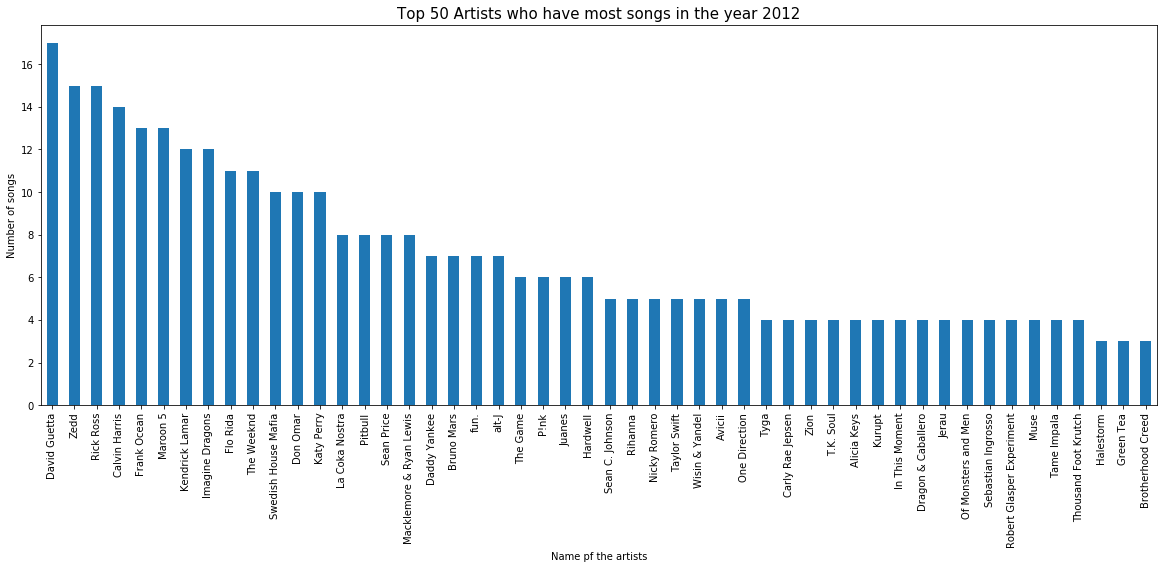

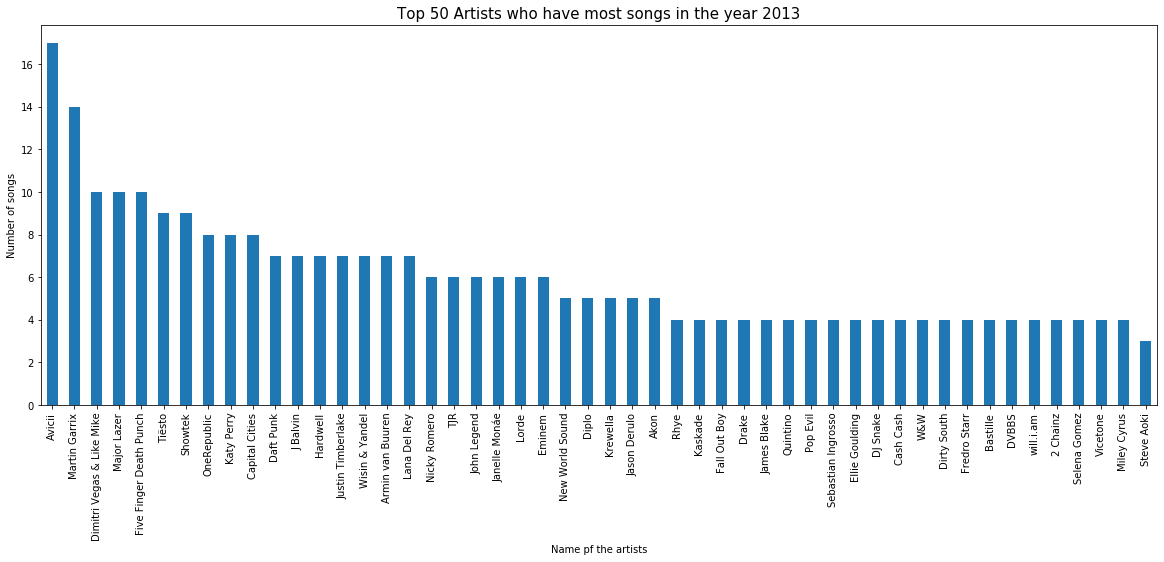

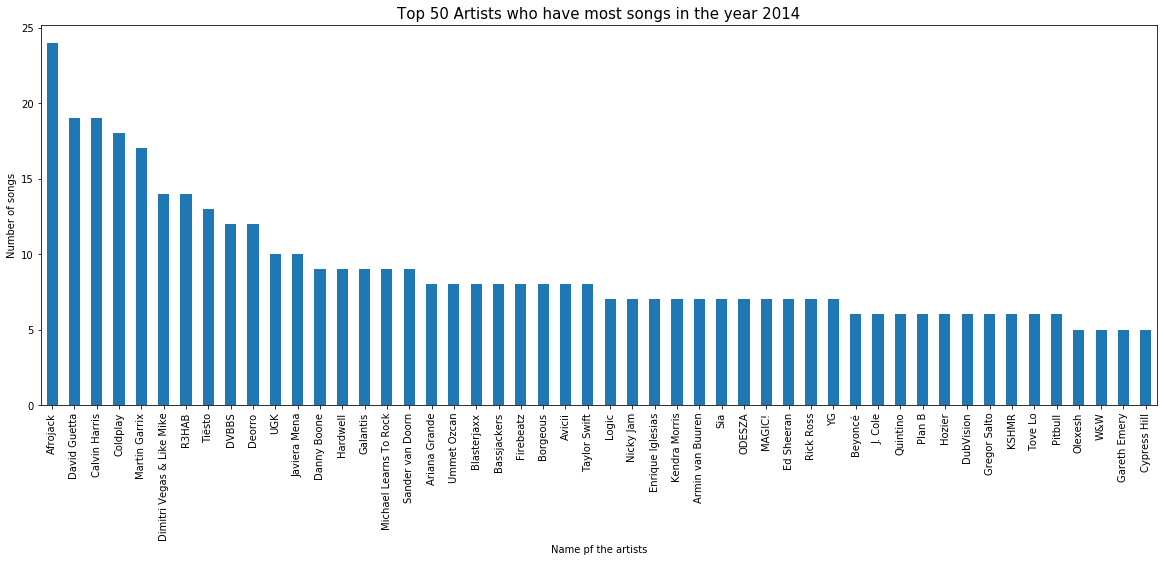

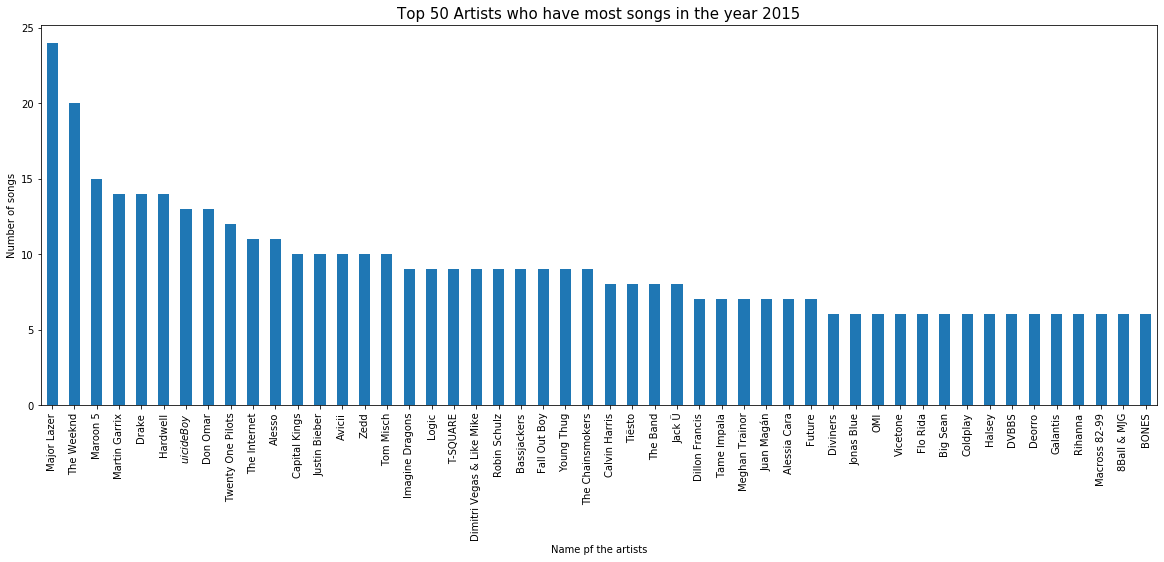

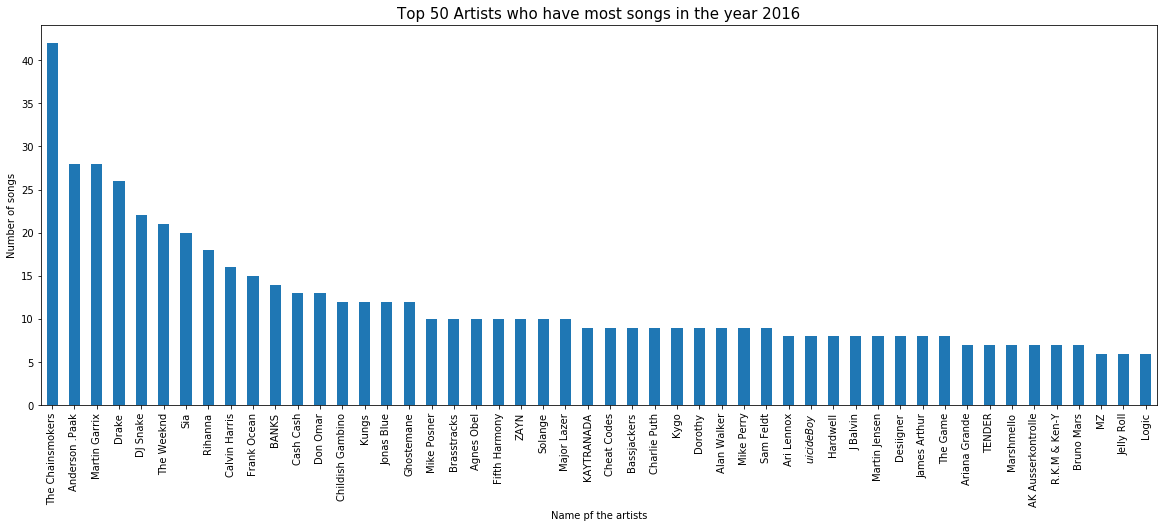

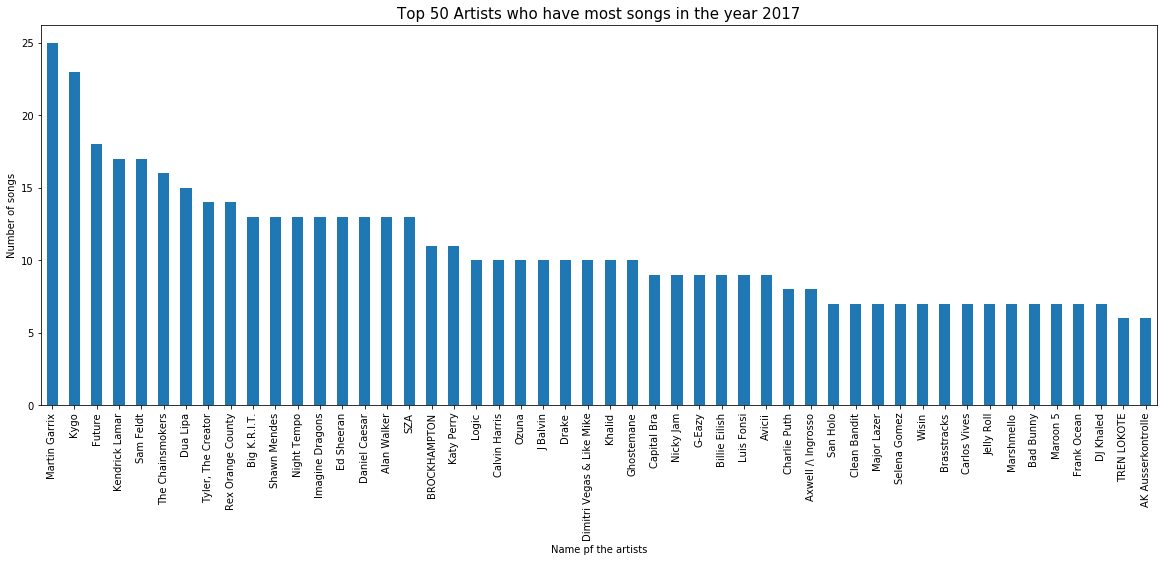

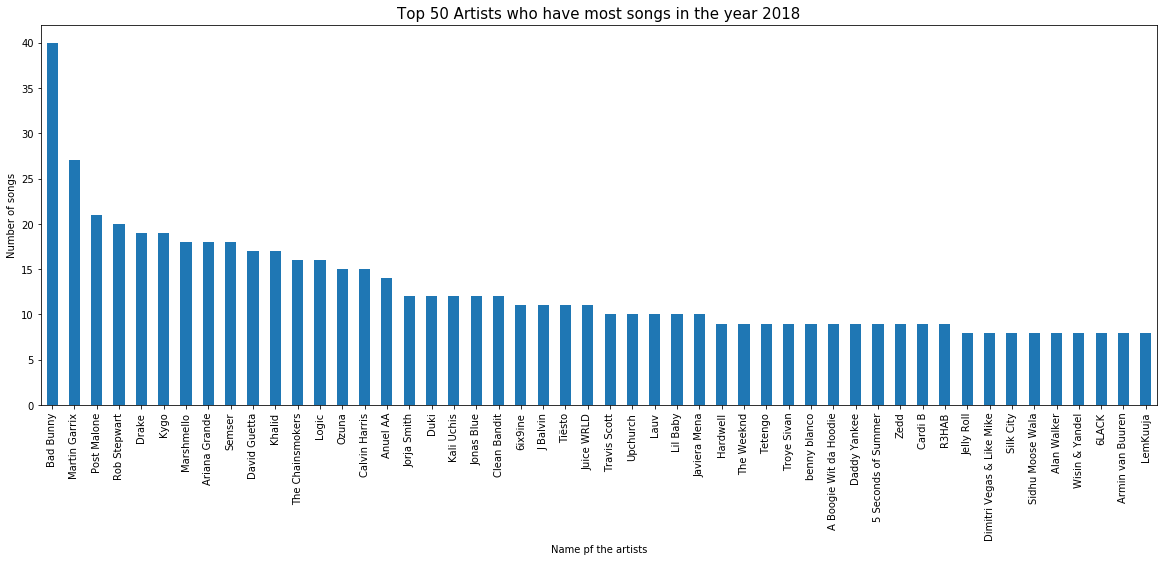

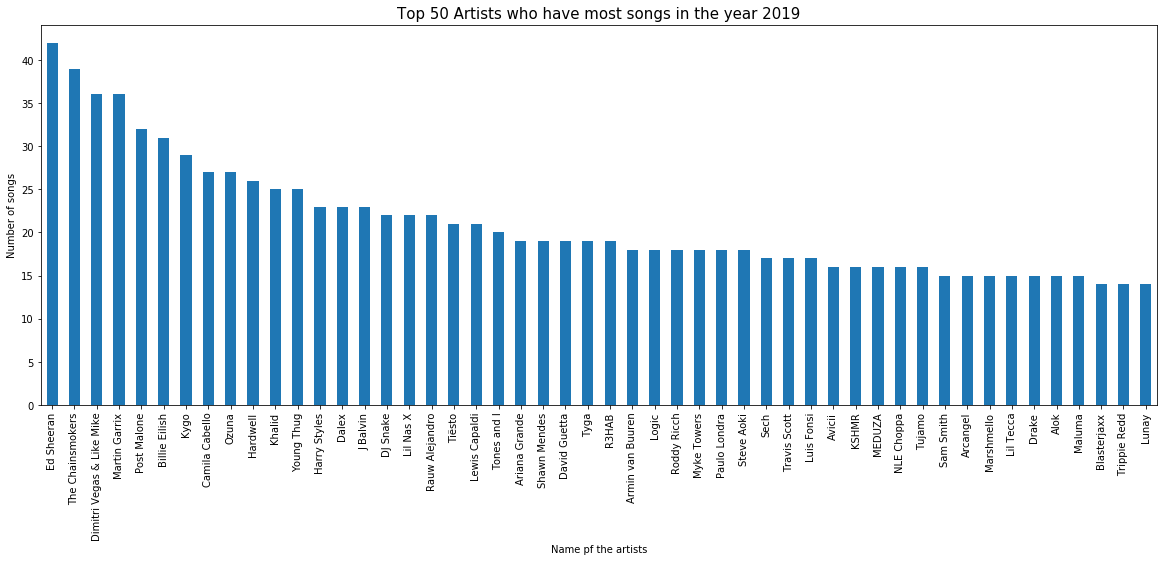

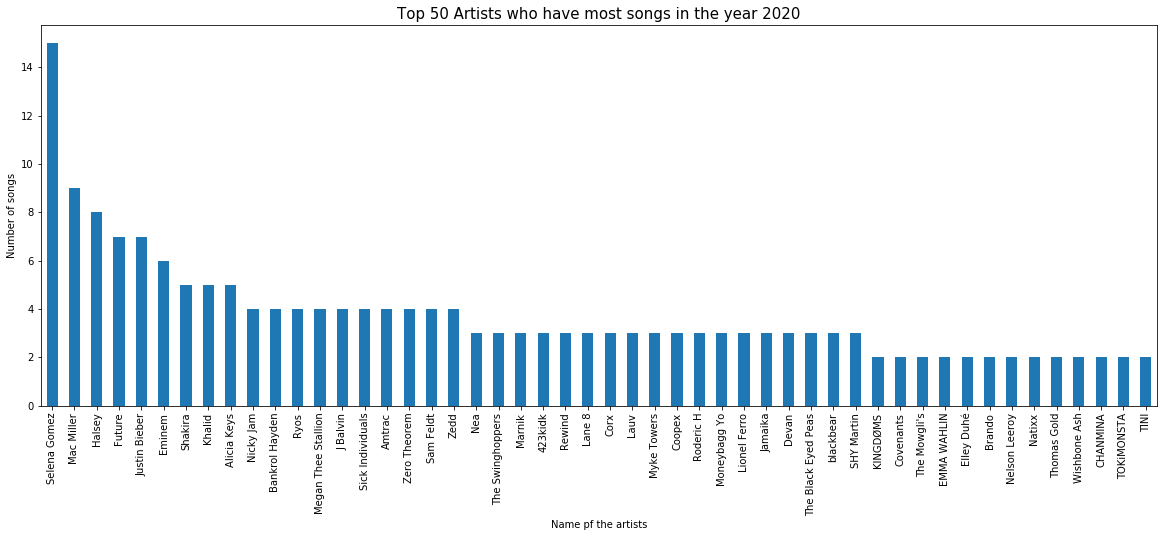

In [12]:
#year 2001
year_2010 = new[new['year']==2010]
plt.figure(figsize = (20,7))
year_2010['track_artist'].value_counts().iloc[0:50].plot(kind = 'bar')
plt.title('Top 50 Artists who have most songs in the year 2010',fontsize = 15)
plt.xlabel('Name pf the artists')
plt.ylabel('Number of songs')

year_2011 = new[new['year']==2011]
plt.figure(figsize = (20,7))
year_2011['track_artist'].value_counts().iloc[0:50].plot(kind = 'bar')
plt.title('Top 50 Artists who have most songs in the year 2011',fontsize = 15)
plt.xlabel('Name pf the artists')
plt.ylabel('Number of songs')


year_2012 = new[new['year']==2012]
plt.figure(figsize = (20,7))
year_2012['track_artist'].value_counts().iloc[0:50].plot(kind = 'bar')
plt.title('Top 50 Artists who have most songs in the year 2012',fontsize = 15)
plt.xlabel('Name pf the artists')
plt.ylabel('Number of songs')


year_2013 = new[new['year']==2013]
plt.figure(figsize = (20,7))
year_2013['track_artist'].value_counts().iloc[0:50].plot(kind = 'bar')
plt.title('Top 50 Artists who have most songs in the year 2013',fontsize = 15)
plt.xlabel('Name pf the artists')
plt.ylabel('Number of songs')


year_2014 = new[new['year']==2014]
plt.figure(figsize = (20,7))
year_2014['track_artist'].value_counts().iloc[0:50].plot(kind = 'bar')
plt.title('Top 50 Artists who have most songs in the year 2014',fontsize = 15)
plt.xlabel('Name pf the artists')
plt.ylabel('Number of songs')


year_2015 = new[new['year']==2015]
plt.figure(figsize = (20,7))
year_2015['track_artist'].value_counts().iloc[0:50].plot(kind = 'bar')
plt.title('Top 50 Artists who have most songs in the year 2015',fontsize = 15)
plt.xlabel('Name pf the artists')
plt.ylabel('Number of songs')


year_2016 = new[new['year']==2016]
plt.figure(figsize = (20,7))
year_2016['track_artist'].value_counts().iloc[0:50].plot(kind = 'bar')
plt.title('Top 50 Artists who have most songs in the year 2016',fontsize = 15)
plt.xlabel('Name pf the artists')
plt.ylabel('Number of songs')


year_2017 = new[new['year']==2017]
plt.figure(figsize = (20,7))
year_2017['track_artist'].value_counts().iloc[0:50].plot(kind = 'bar')
plt.title('Top 50 Artists who have most songs in the year 2017',fontsize = 15)
plt.xlabel('Name pf the artists')
plt.ylabel('Number of songs')


year_2018 = new[new['year']==2018]
plt.figure(figsize = (20,7))
year_2018['track_artist'].value_counts().iloc[0:50].plot(kind = 'bar')
plt.title('Top 50 Artists who have most songs in the year 2018',fontsize = 15)
plt.xlabel('Name pf the artists')
plt.ylabel('Number of songs')


year_2019 = new[new['year']==2019]
plt.figure(figsize = (20,7))
year_2019['track_artist'].value_counts().iloc[0:50].plot(kind = 'bar')
plt.title('Top 50 Artists who have most songs in the year 2019',fontsize = 15)
plt.xlabel('Name pf the artists')
plt.ylabel('Number of songs')


year_2020 = new[new['year']==2020]
plt.figure(figsize = (20,7))
year_2020['track_artist'].value_counts().iloc[0:50].plot(kind = 'bar')
plt.title('Top 50 Artists who have most songs in the year 2020',fontsize = 15)
plt.xlabel('Name pf the artists')
plt.ylabel('Number of songs')

# Artists who have popularity greater than 80

Text(0.5, 1.0, 'Artist who have popularity greater than 80 in year 2020')

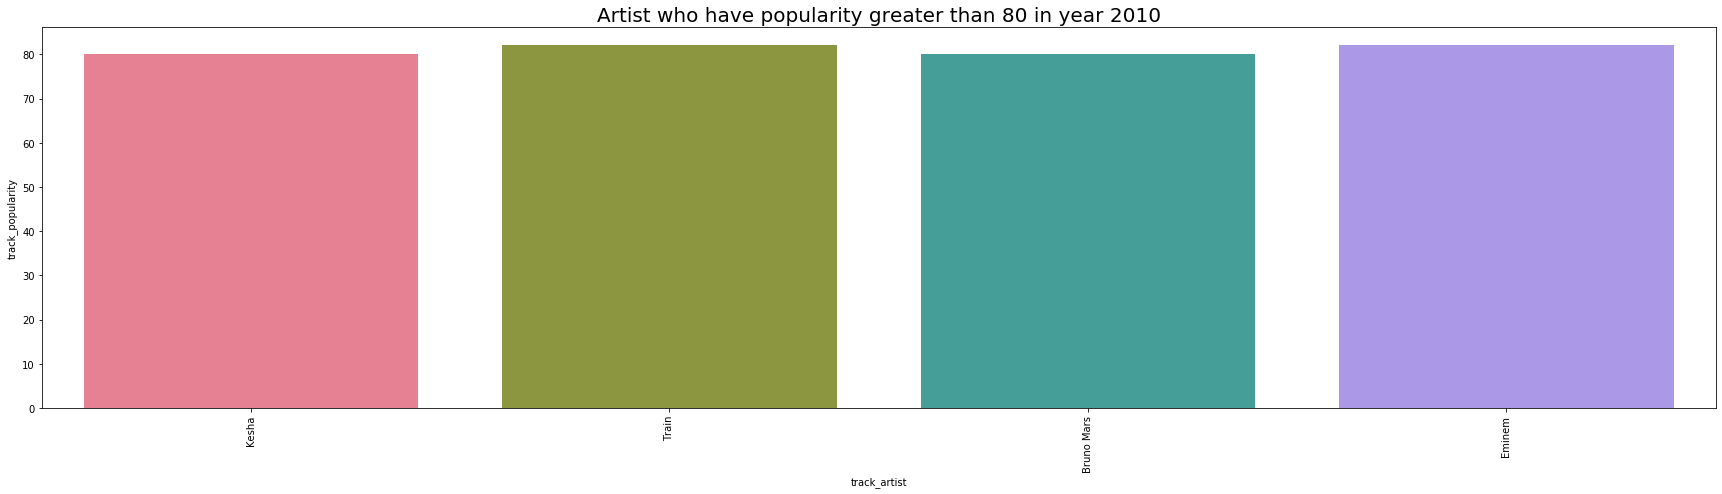

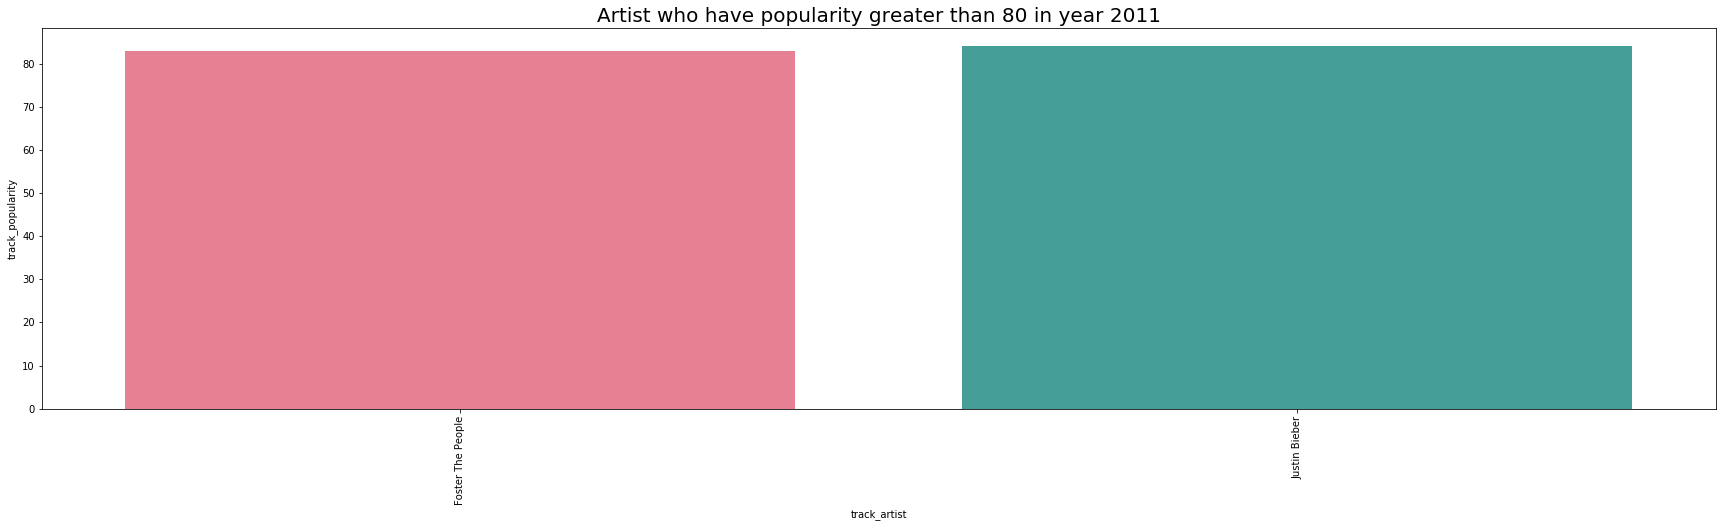

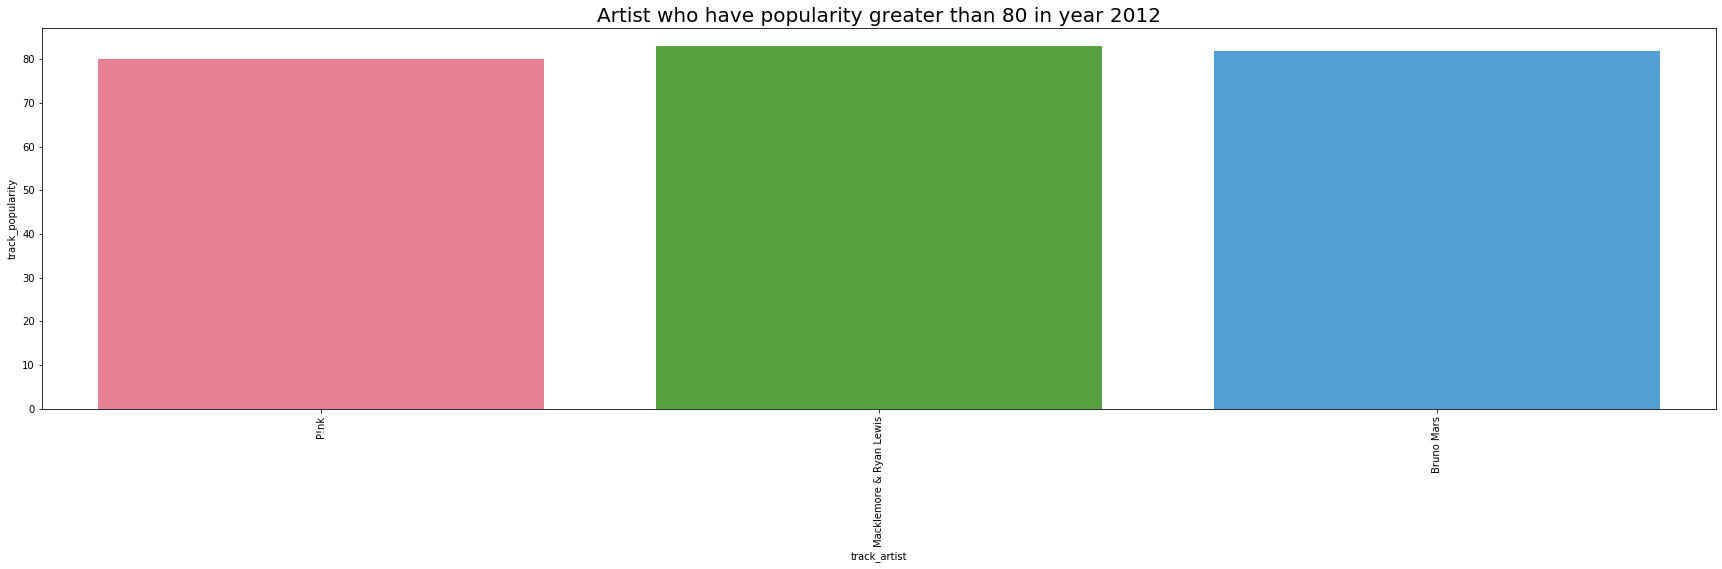

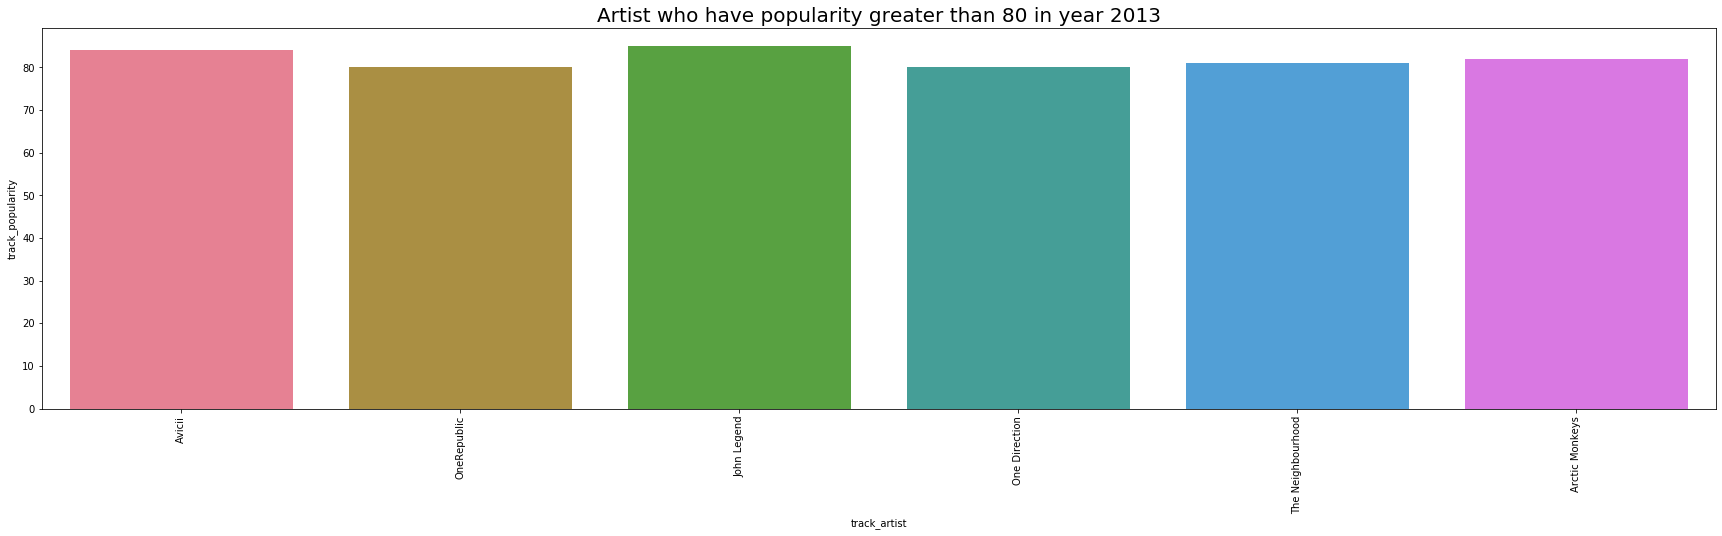

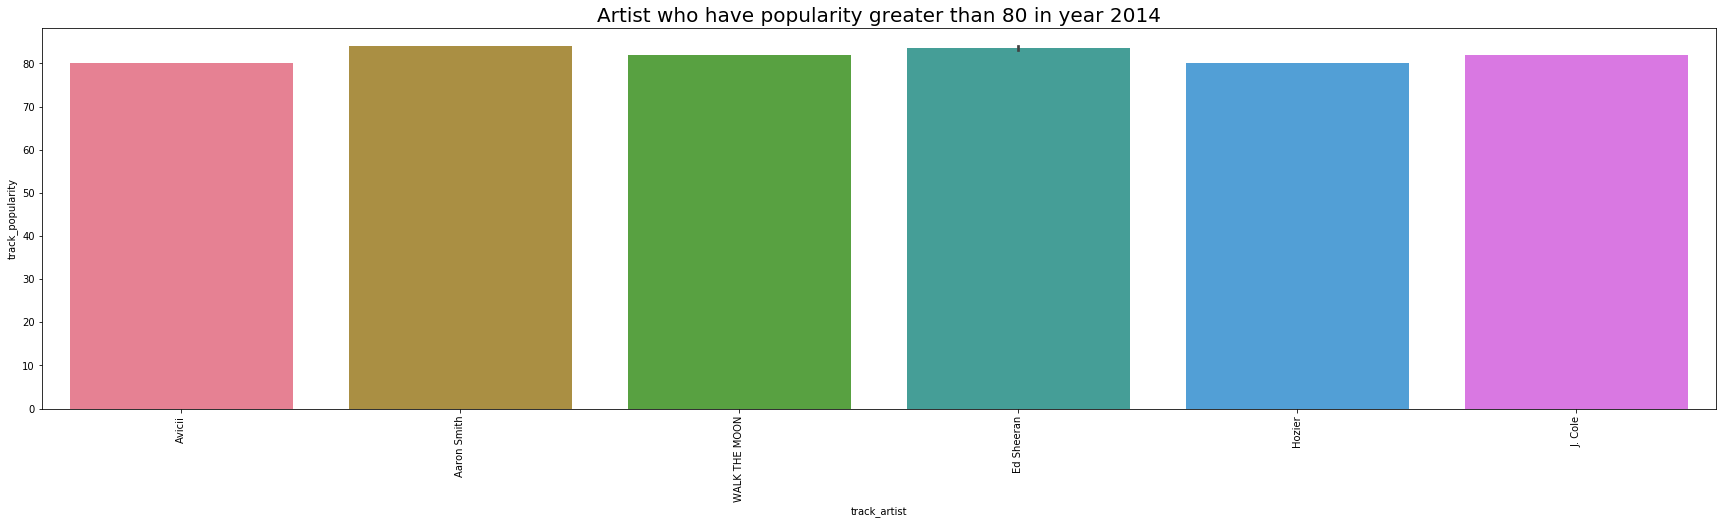

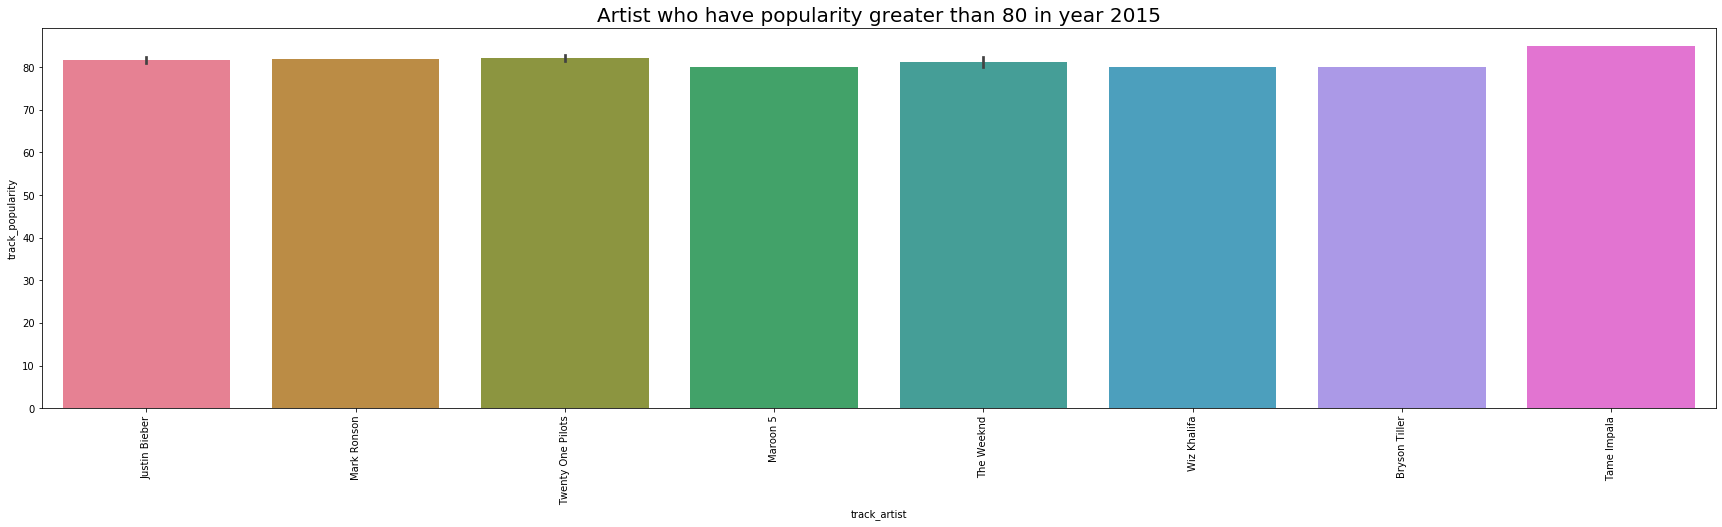

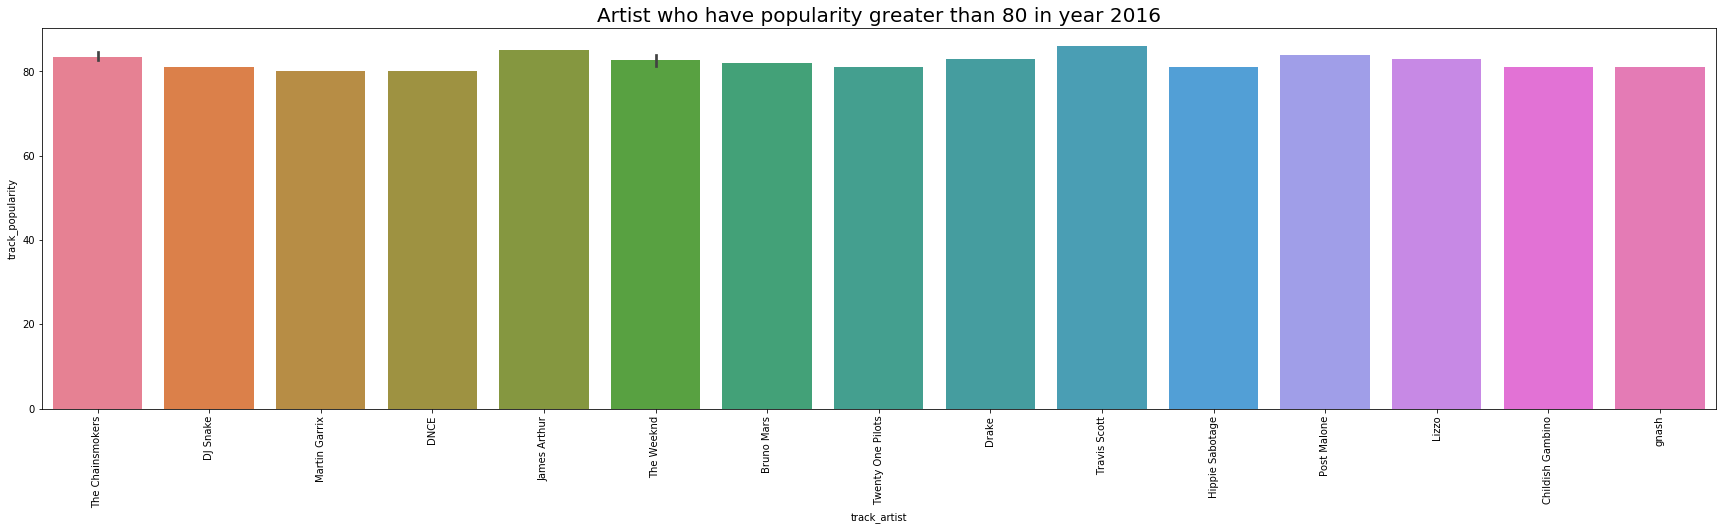

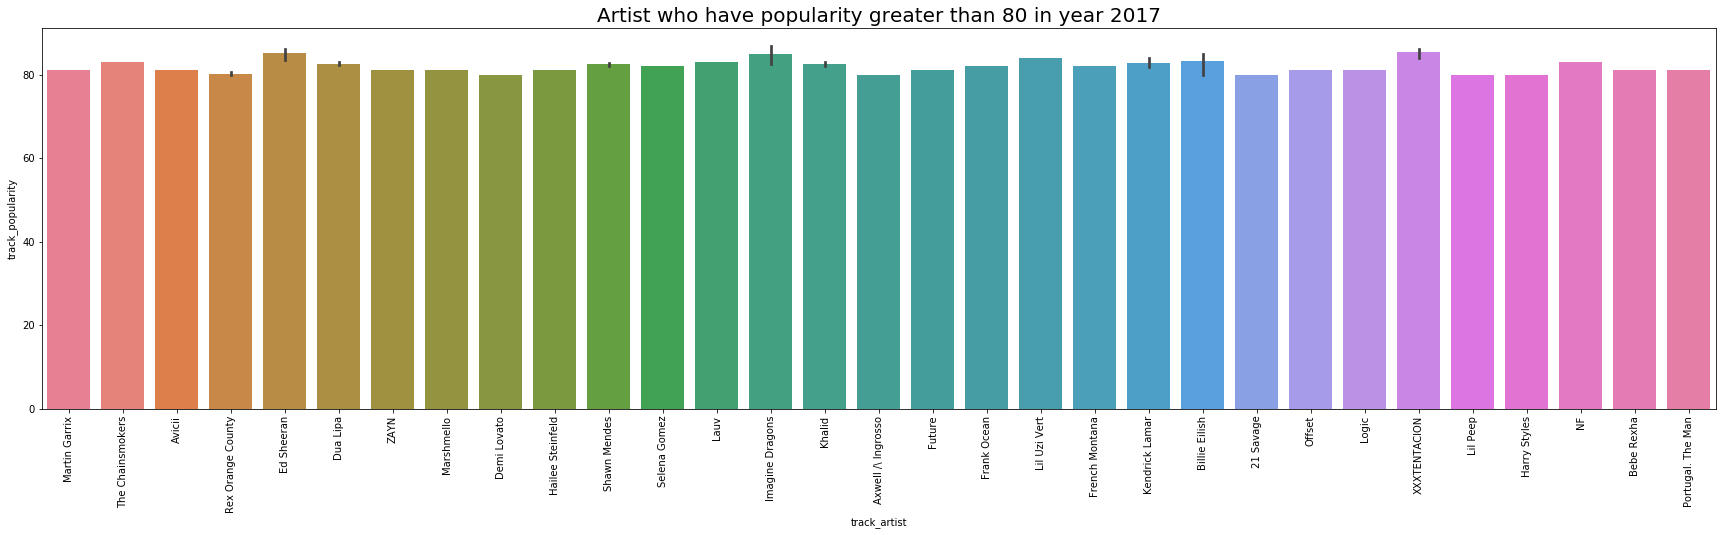

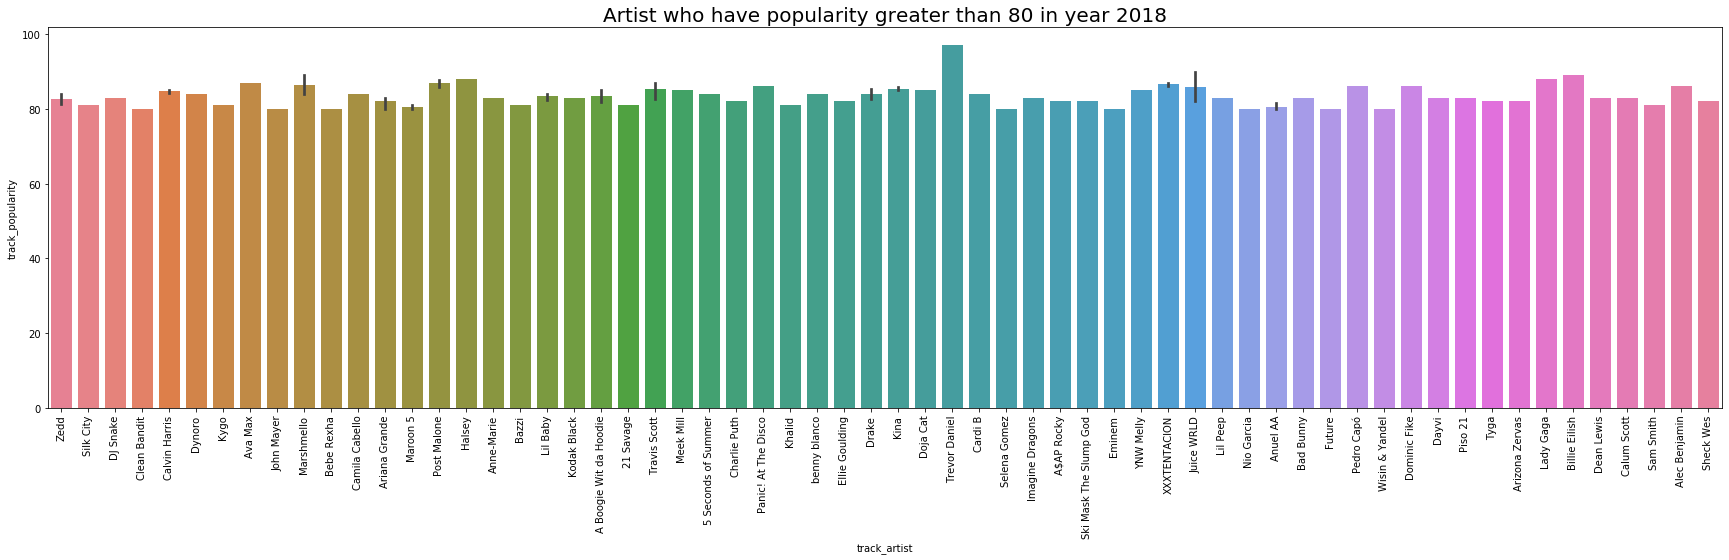

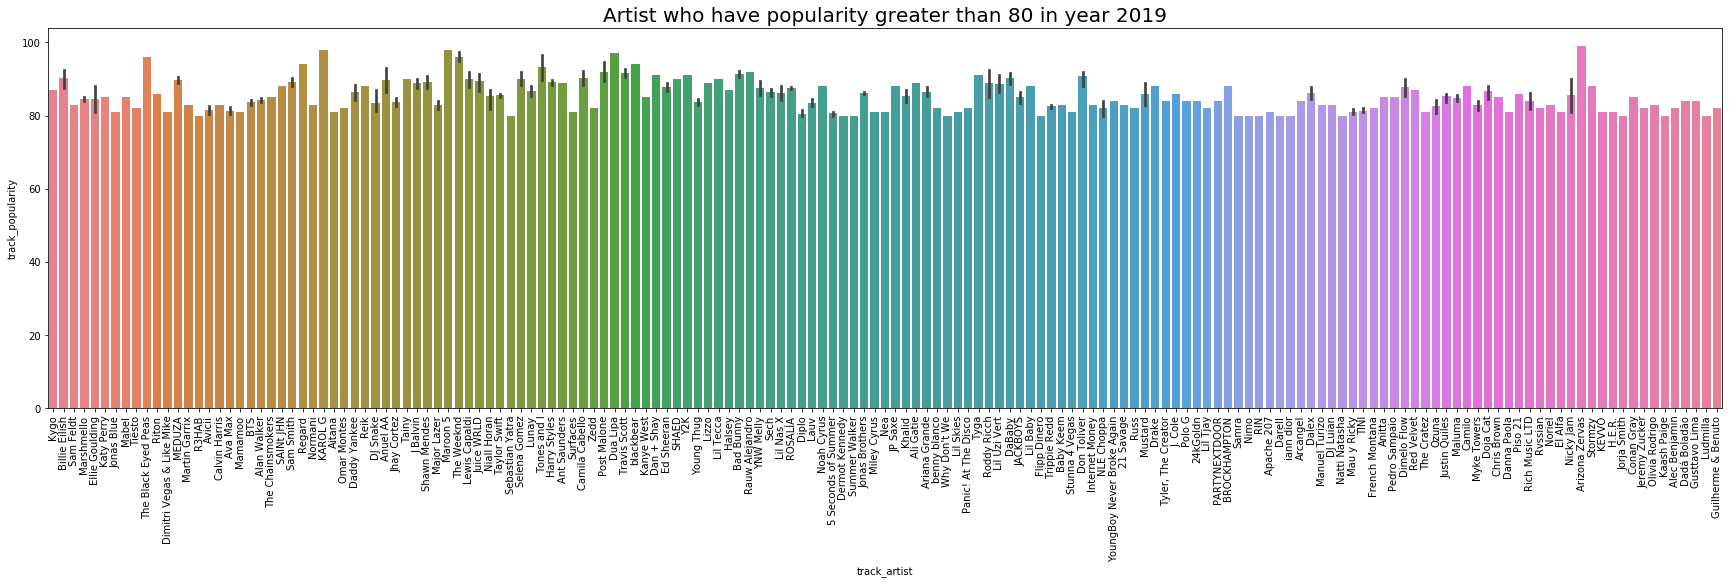

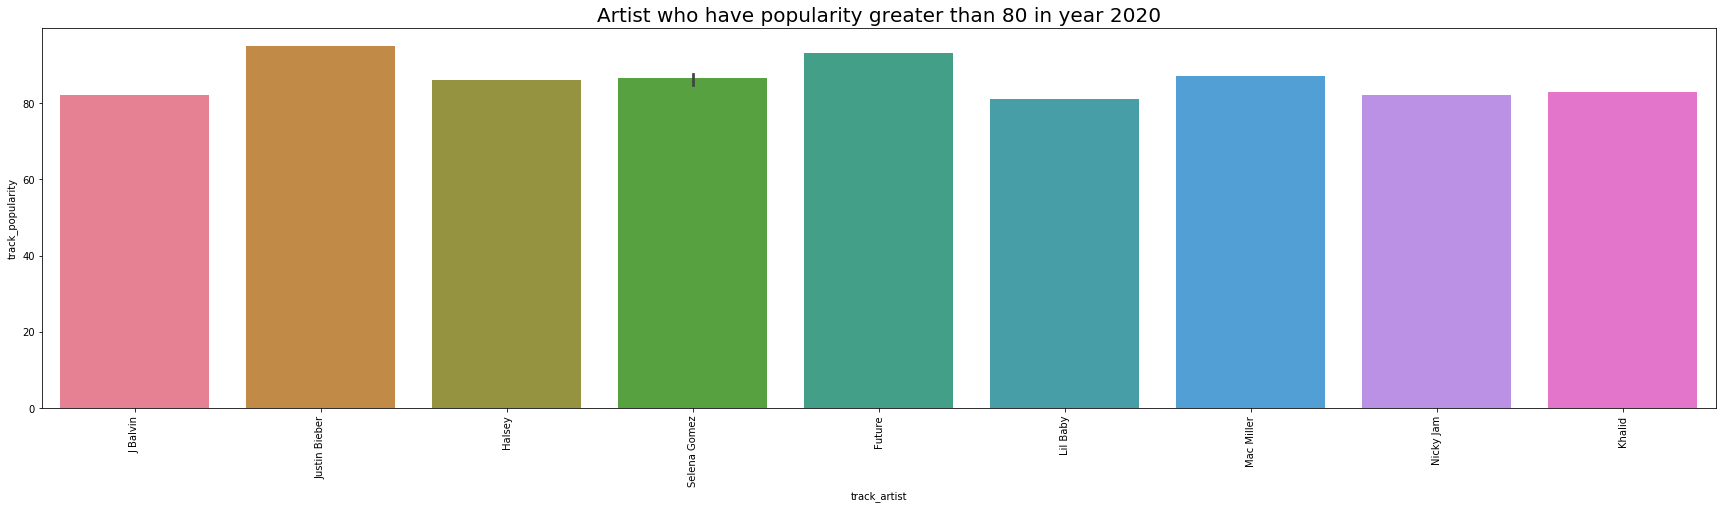

In [13]:
year_2010 = new[new['year']==2010]
pop = year_2010[year_2010['track_popularity']>=80]
plt.figure(figsize = (30,7))
sns.barplot(x='track_artist',y='track_popularity',data=pop,palette = 'husl')
plt.xticks(rotation=90)
plt.title('Artist who have popularity greater than 80 in year 2010',fontsize=20)


year_2011 = new[new['year']==2011]
pop = year_2011[year_2011['track_popularity']>=80]
plt.figure(figsize = (30,7))
sns.barplot(x='track_artist',y='track_popularity',data=pop,palette = 'husl')
plt.xticks(rotation=90)
plt.title('Artist who have popularity greater than 80 in year 2011',fontsize=20)


year_2012 = new[new['year']==2012]
pop = year_2012[year_2012['track_popularity']>=80]
plt.figure(figsize = (30,7))
sns.barplot(x='track_artist',y='track_popularity',data=pop,palette = 'husl')
plt.xticks(rotation=90)
plt.title('Artist who have popularity greater than 80 in year 2012',fontsize=20)


year_2013 = new[new['year']==2013]
pop = year_2013[year_2013['track_popularity']>=80]
plt.figure(figsize = (30,7))
sns.barplot(x='track_artist',y='track_popularity',data=pop,palette = 'husl')
plt.xticks(rotation=90)
plt.title('Artist who have popularity greater than 80 in year 2013',fontsize=20)


year_2014 = new[new['year']==2014]
pop = year_2014[year_2014['track_popularity']>=80]
plt.figure(figsize = (30,7))
sns.barplot(x='track_artist',y='track_popularity',data=pop,palette = 'husl')
plt.xticks(rotation=90)
plt.title('Artist who have popularity greater than 80 in year 2014',fontsize=20)


year_2015 = new[new['year']==2015]
pop = year_2015[year_2015['track_popularity']>=80]
plt.figure(figsize = (30,7))
sns.barplot(x='track_artist',y='track_popularity',data=pop,palette = 'husl')
plt.xticks(rotation=90)
plt.title('Artist who have popularity greater than 80 in year 2015',fontsize=20)


year_2016 = new[new['year']==2016]
pop = year_2016[year_2016['track_popularity']>=80]
plt.figure(figsize = (30,7))
sns.barplot(x='track_artist',y='track_popularity',data=pop,palette = 'husl')
plt.xticks(rotation=90)
plt.title('Artist who have popularity greater than 80 in year 2016',fontsize=20)


year_2017 = new[new['year']==2017]
pop = year_2017[year_2017['track_popularity']>=80]
plt.figure(figsize = (30,7))
sns.barplot(x='track_artist',y='track_popularity',data=pop,palette = 'husl')
plt.xticks(rotation=90)
plt.title('Artist who have popularity greater than 80 in year 2017',fontsize=20)


year_2018 = new[new['year']==2018]
pop = year_2018[year_2018['track_popularity']>=80]
plt.figure(figsize = (30,7))
sns.barplot(x='track_artist',y='track_popularity',data=pop,palette = 'husl')
plt.xticks(rotation=90)
plt.title('Artist who have popularity greater than 80 in year 2018',fontsize=20)


year_2019 = new[new['year']==2019]
pop = year_2019[year_2019['track_popularity']>=80]
plt.figure(figsize = (30,7))
sns.barplot(x='track_artist',y='track_popularity',data=pop,palette = 'husl')
plt.xticks(rotation=90)
plt.title('Artist who have popularity greater than 80 in year 2019',fontsize=20)


year_2020 = new[new['year']==2020]
pop = year_2020[year_2020['track_popularity']>=80]
plt.figure(figsize = (30,7))
sns.barplot(x='track_artist',y='track_popularity',data=pop,palette = 'husl')
plt.xticks(rotation=90)
plt.title('Artist who have popularity greater than 80 in year 2020',fontsize=20)

# Popular Genres

In [14]:
genre = df_new['playlist_genre'].value_counts()

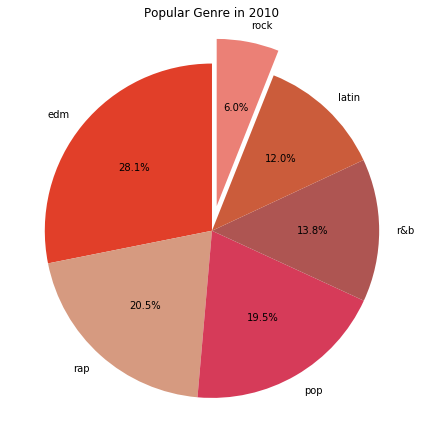

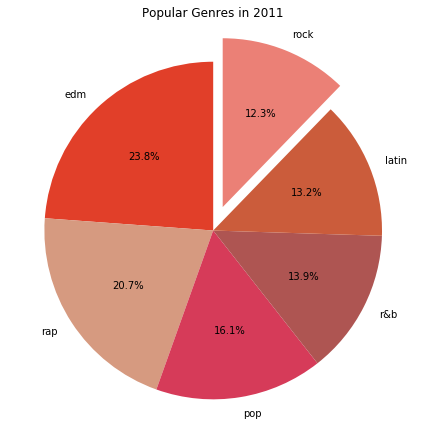

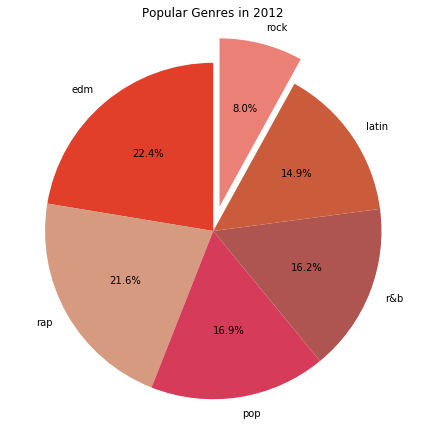

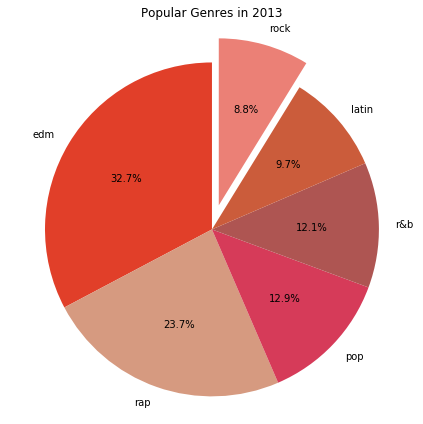

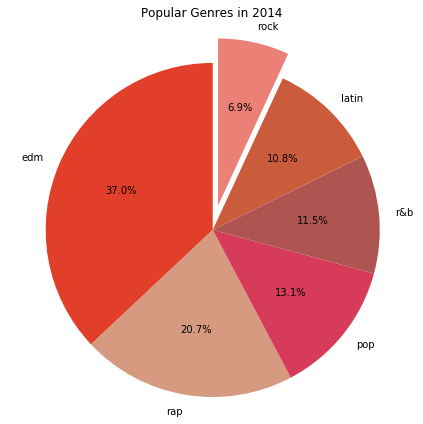

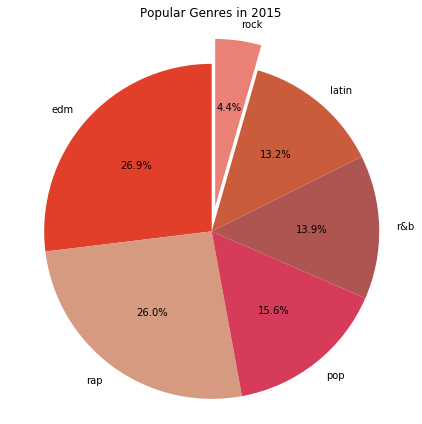

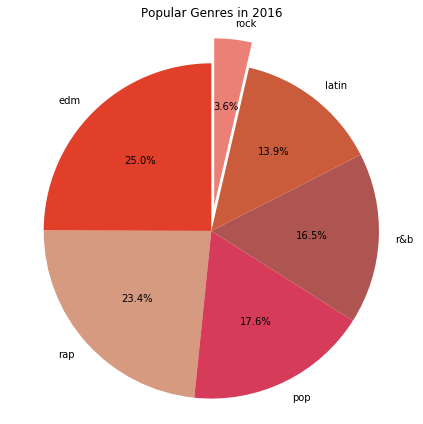

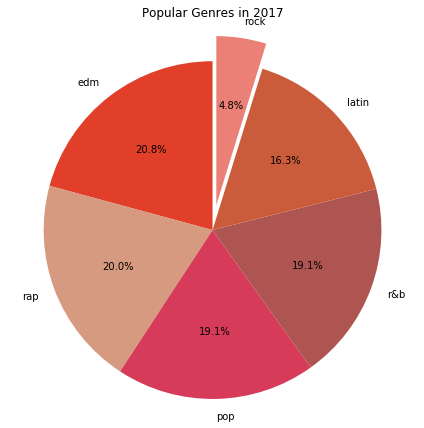

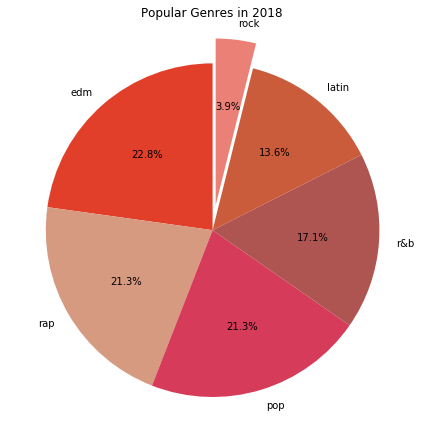

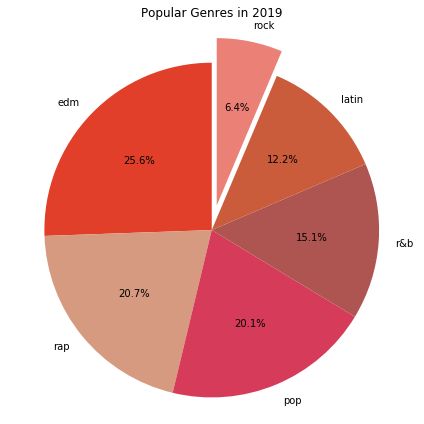

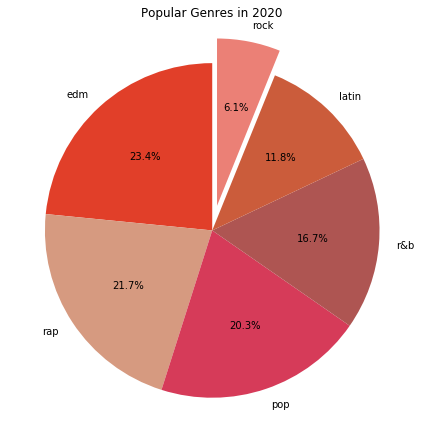

In [23]:
# year 2010
genre_2010 = year_2010['playlist_genre'].value_counts()
colors = ["#E13F29", "#D69A80", "#D63B59", "#AE5552", "#CB5C3B", "#EB8076"]
labels = ['edm','rap','pop','r&b','latin','rock']

# Create a pie chart
plt.figure(figsize=(6,6))
plt.pie(
    genre_2010,
    labels=labels,
    shadow=False,
    colors=colors,
    explode=(0, 0, 0, 0, 0,0.15),
    startangle=90,
    autopct='%1.1f%%',
    )

# View the plot drop above
plt.axis('equal')
plt.title('Popular Genre in 2010')

# View the plot
plt.tight_layout()
plt.show()

# year 2011
genre_2011 = year_2011['playlist_genre'].value_counts()
plt.figure(figsize=(6,6))

plt.pie(
    genre_2011,
    labels=labels,
    shadow=False,
    colors=colors,
    explode=(0, 0, 0, 0, 0,0.15),
    startangle=90,
    autopct='%1.1f%%',
    )

# View the plot drop above
plt.axis('equal')
plt.title('Popular Genres in 2011')

# View the plot
plt.tight_layout()
plt.show()


# year 2012
genre_2012 = year_2012['playlist_genre'].value_counts()
plt.figure(figsize=(6,6))

plt.pie(
    genre_2012,
    labels=labels,
    shadow=False,
    colors=colors,
    explode=(0, 0, 0, 0, 0,0.15),
    startangle=90,
    autopct='%1.1f%%',
    )

# View the plot drop above
plt.axis('equal')
plt.title('Popular Genres in 2012')

# View the plot
plt.tight_layout()
plt.show()


# year 2013
genre_2013 = year_2013['playlist_genre'].value_counts()
plt.figure(figsize=(6,6))

plt.pie(
    genre_2013,
    labels=labels,
    shadow=False,
    colors=colors,
    explode=(0, 0, 0, 0, 0,0.15),
    startangle=90,
    autopct='%1.1f%%',
    )

# View the plot drop above
plt.axis('equal')
plt.title('Popular Genres in 2013')

# View the plot
plt.tight_layout()
plt.show()


# year 2014
genre_2014 = year_2014['playlist_genre'].value_counts()
plt.figure(figsize=(6,6))

plt.pie(
    genre_2014,
    labels=labels,
    shadow=False,
    colors=colors,
    explode=(0, 0, 0, 0, 0,0.15),
    startangle=90,
    autopct='%1.1f%%',
    )

# View the plot drop above
plt.axis('equal')
plt.title('Popular Genres in 2014')

# View the plot
plt.tight_layout()
plt.show()


# year 2015
genre_2015 = year_2015['playlist_genre'].value_counts()
plt.figure(figsize=(6,6))

plt.pie(
    genre_2015,
    labels=labels,
    shadow=False,
    colors=colors,
    explode=(0, 0, 0, 0, 0,0.15),
    startangle=90,
    autopct='%1.1f%%',
    )

# View the plot drop above
plt.axis('equal')
plt.title('Popular Genres in 2015')

# View the plot
plt.tight_layout()
plt.show()


# year 2016
genre_2016 = year_2016['playlist_genre'].value_counts()
plt.figure(figsize=(6,6))

plt.pie(
    genre_2016,
    labels=labels,
    shadow=False,
    colors=colors,
    explode=(0, 0, 0, 0, 0,0.15),
    startangle=90,
    autopct='%1.1f%%',
    )

# View the plot drop above
plt.axis('equal')
plt.title('Popular Genres in 2016')

# View the plot
plt.tight_layout()
plt.show()


# year 2017
genre_2017 = year_2017['playlist_genre'].value_counts()
plt.figure(figsize=(6,6))

plt.pie(
    genre_2017,
    labels=labels,
    shadow=False,
    colors=colors,
    explode=(0, 0, 0, 0, 0,0.15),
    startangle=90,
    autopct='%1.1f%%',
    )

# View the plot drop above
plt.axis('equal')
plt.title('Popular Genres in 2017')

# View the plot
plt.tight_layout()
plt.show()


# year 2018
genre_2018 = year_2018['playlist_genre'].value_counts()
plt.figure(figsize=(6,6))

plt.pie(
    genre_2018,
    labels=labels,
    shadow=False,
    colors=colors,
    explode=(0, 0, 0, 0, 0,0.15),
    startangle=90,
    autopct='%1.1f%%',
    )

# View the plot drop above
plt.axis('equal')
plt.title('Popular Genres in 2018')

# View the plot
plt.tight_layout()
plt.show()


# year 2013
genre_2019 = year_2019['playlist_genre'].value_counts()
plt.figure(figsize=(6,6))

plt.pie(
    genre_2019,
    labels=labels,
    shadow=False,
    colors=colors,
    explode=(0, 0, 0, 0, 0,0.15),
    startangle=90,
    autopct='%1.1f%%',
    )

# View the plot drop above
plt.axis('equal')
plt.title('Popular Genres in 2019')

# View the plot
plt.tight_layout()
plt.show()


# year 2013
genre_2020 = year_2020['playlist_genre'].value_counts()
plt.figure(figsize=(6,6))

plt.pie(
    genre_2020,
    labels=labels,
    shadow=False,
    colors=colors,
    explode=(0, 0, 0, 0, 0,0.15),
    startangle=90,
    autopct='%1.1f%%',
    )

# View the plot drop above
plt.axis('equal')
plt.title('Popular Genres in 2020')

# View the plot
plt.tight_layout()
plt.show()